<a href="https://colab.research.google.com/github/Seraphene/titanic-survivor/blob/main/TitanicSurvivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset from a direct URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Display the first 5 rows
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [16]:
# 1. Create a fresh copy of the data
df = data.copy()

# --- FEATURE ENGINEERING (The New Magic) ---
# NEW (No Warning)
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Map awkward titles to standard ones
# (Mlle is French for Miss, Mme is French for Mrs, etc.)
title_mapping = {
    'Mr': 0, 'Miss': 1, 'Mrs': 2,
    'Master': 3, 'Dr': 3, 'Rev': 3, 'Col': 3, 'Major': 3, 'Mlle': 1,
    'Countess': 3, 'Ms': 1, 'Lady': 3, 'Jonkheer': 3, 'Don': 3,
    'Dona' : 3, 'Mme': 2, 'Capt': 3, 'Sir': 3
}
# Everything else (like 'Jonkheer') becomes '3' (Rare/Other)
df['Title'] = df['Title'].map(title_mapping)
# -------------------------------------------

# 2. Cleanup the rest (Standard Stuff)
df = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Convert Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Fill Missing Age (We can still use mean, or improve this later)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Convert Embarked
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("New Columns:", df.columns.values)
print(df.head())

New Columns: ['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title']
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0         0       3    0  22.0      1      0   7.2500         0      0
1         1       1    1  38.0      1      0  71.2833         1      2
2         1       3    1  26.0      0      0   7.9250         0      1
3         1       1    1  35.0      1      0  53.1000         0      2
4         0       3    0  35.0      0      0   8.0500         0      0


In [18]:
# 1. Separate Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Model (Using Depth 7)
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, y_train)

# 4. Check the Score
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy with Title Feature: {accuracy * 100:.2f}%")

Accuracy with Title Feature: 83.24%


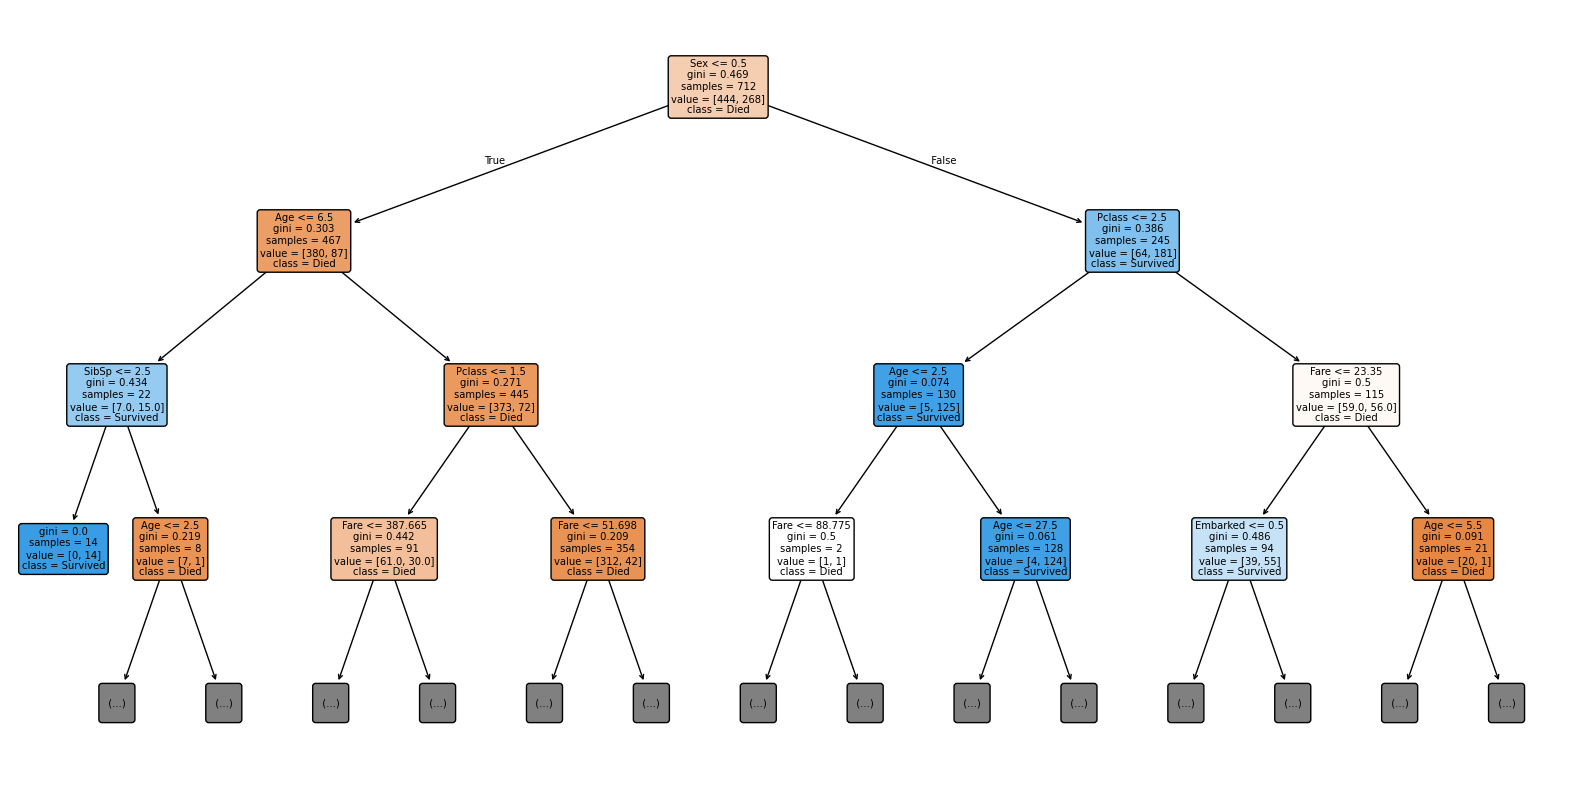

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Make the picture big enough to read
plt.figure(figsize=(20,10))

# Draw the tree!
plot_tree(model,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          max_depth=3) # We limit depth to 3 levels so it's readable

plt.show()

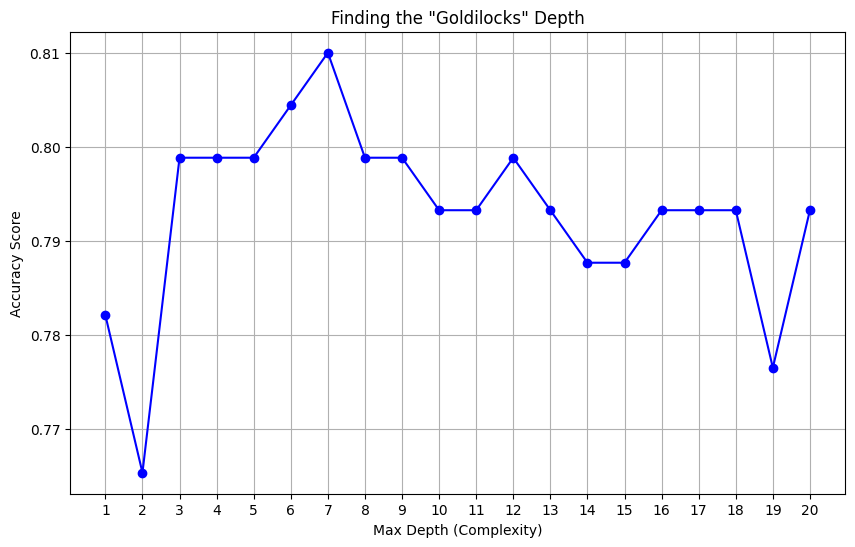

The highest accuracy was 81.01% at Depth 7


In [5]:
import matplotlib.pyplot as plt

# 1. Create lists to store our scores
depths = []
scores = []

# 2. Loop from 1 to 20
for i in range(1, 21):
    # Create the model with a specific depth 'i'
    model = DecisionTreeClassifier(max_depth=i, random_state=42)

    # Train it
    model.fit(X_train, y_train)

    # Test it
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Store the results
    depths.append(i)
    scores.append(accuracy)

# 3. Plot the results!
plt.figure(figsize=(10, 6))
plt.plot(depths, scores, marker='o', linestyle='-', color='b')
plt.title('Finding the "Goldilocks" Depth')
plt.xlabel('Max Depth (Complexity)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.xticks(range(1, 21)) # Show all numbers 1-20 on the bottom
plt.show()

# Print the winner
best_score = max(scores)
best_depth = depths[scores.index(best_score)]
print(f"The highest accuracy was {best_score*100:.2f}% at Depth {best_depth}")

In [12]:
# 1. Create the model with your Winning Depth
# (Example: If your graph peaked at 3, put 3)
final_model = DecisionTreeClassifier(max_depth=7, random_state=42)

# 2. Train it on the full training data
final_model.fit(X_train, y_train)

# 3. Verify the score one last time
final_predictions = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)

print(f"Final Optimized Model Accuracy: {final_accuracy * 100:.2f}%")

Final Optimized Model Accuracy: 81.01%


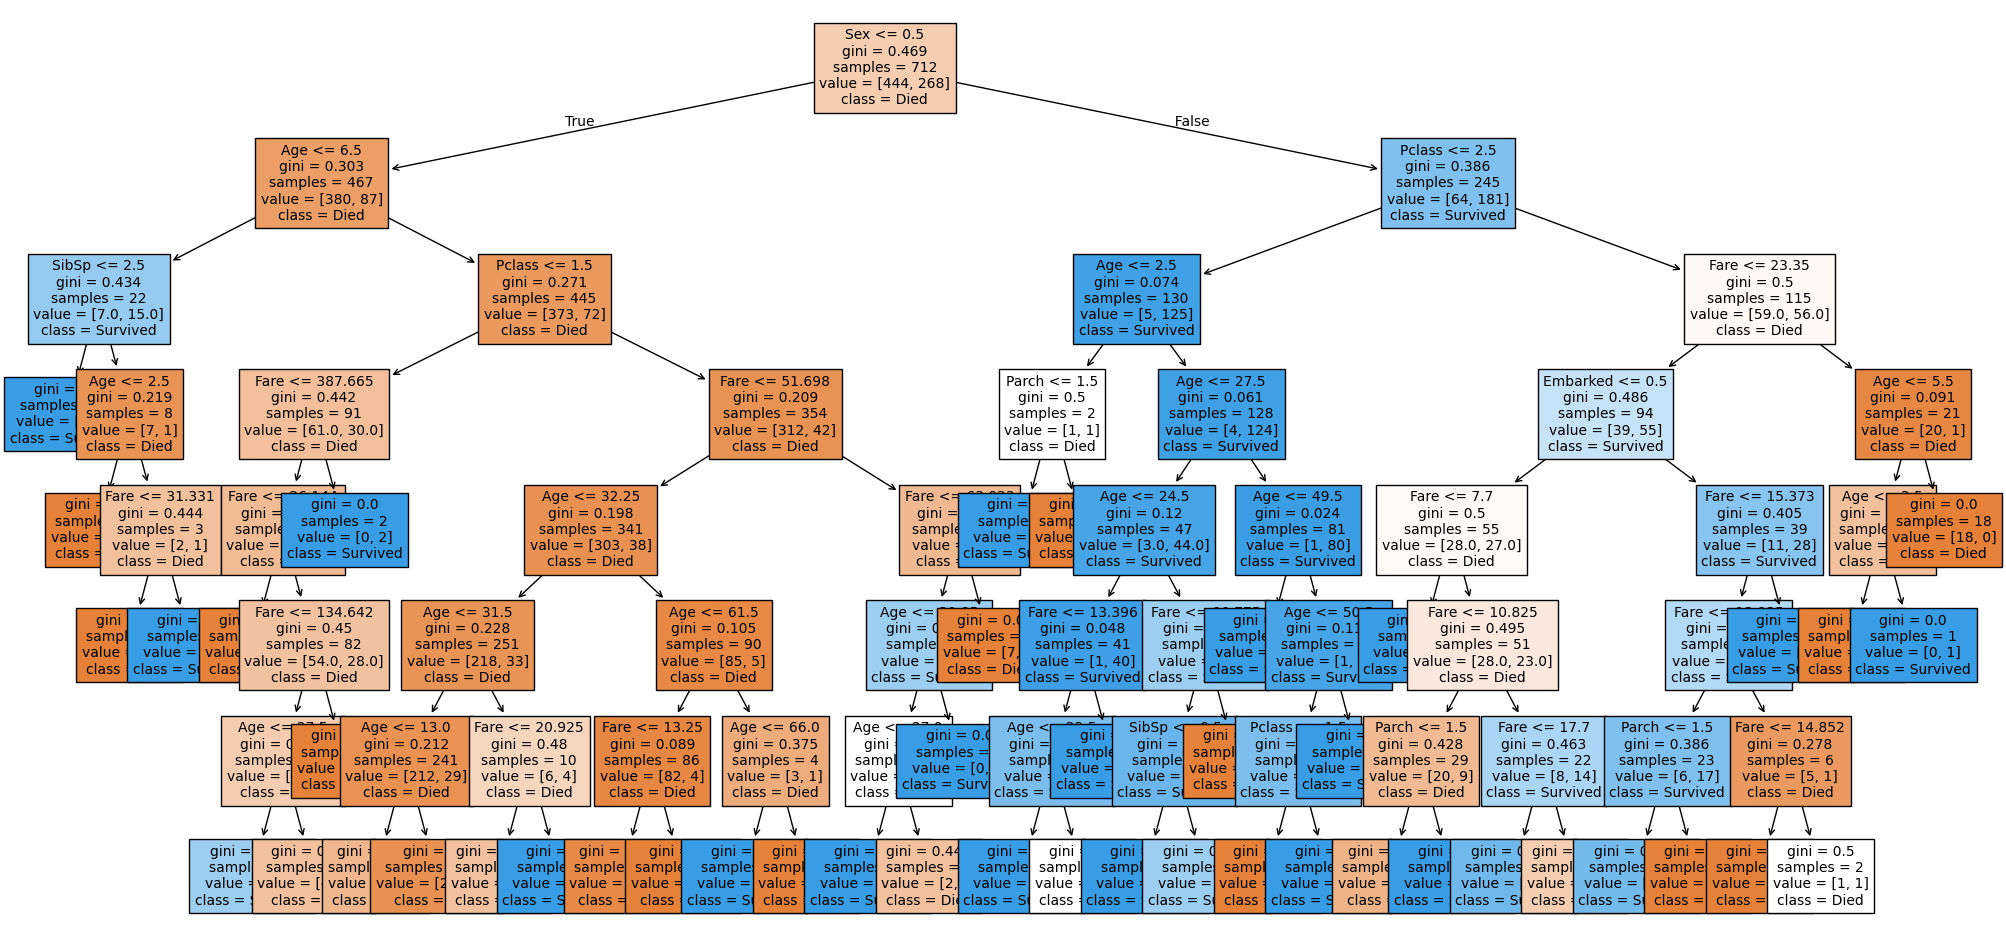

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Create your Best Model (Depth 7)
best_model = DecisionTreeClassifier(max_depth=7, random_state=42)
best_model.fit(X_train, y_train)

# 2. Draw the Picture
plt.figure(figsize=(25, 12)) # Make it wide
plot_tree(best_model,
          feature_names=X.columns,
          class_names=['Died', 'Survived'],
          filled=True,
          fontsize=10)

plt.show()